In [1]:
import pandas as pd

df=pd.read_csv("datasets/student_score/train.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [2]:
df

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599
629998,629998,20,male,b.com,1.54,75.1,yes,8.2,average,group study,high,moderate,59.100


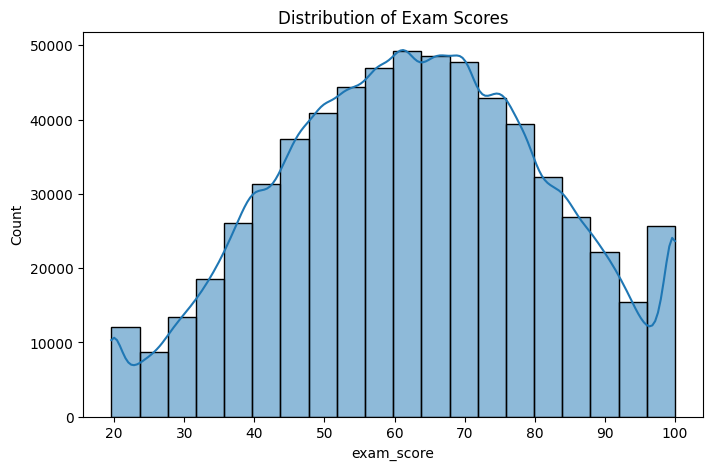

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['exam_score'], kde=True, bins=20)
plt.title("Distribution of Exam Scores")
plt.show()

KeyboardInterrupt: 

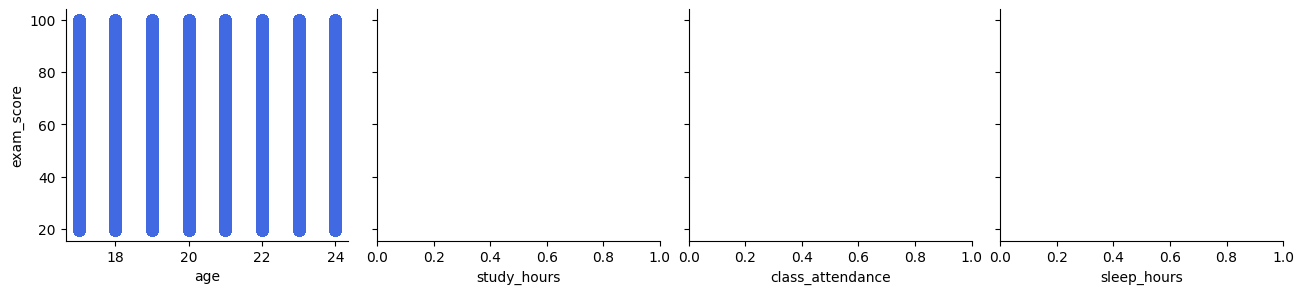

In [3]:
numeric_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']

g = sns.pairplot(
    df[numeric_cols],
    y_vars=['exam_score'],
    x_vars=numeric_cols[:-1],
    kind='reg',
    height=3,
    aspect=1.1,
    plot_kws={
        'line_kws': {'color': 'red', 'lw': 2.5},           # thicker line
        'scatter_kws': {'alpha': 0.6, 's': 60, 'color': 'royalblue'},
        'ci': 95                                           # show confidence interval
    }
)

# Optional: make confidence band more visible
for ax in g.axes.flat:
    for child in ax.get_children():
        if isinstance(child, plt.Polygon):  # confidence interval band
            child.set_alpha(0.18)
            child.set_color('red')

plt.suptitle("Exam Score vs Numeric Features + Regression", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/gn/2z281gyj7fn5l8qxgdd1h6xw0000gn/T/ipykernel_7991/3548127665.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/gn/2z281gyj7fn5l8qxgdd1h6xw0000gn/T/ipykernel_7991/3548127665.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/gn/2z281gyj7fn5l8qxgdd1h6xw0000gn/T/ipykernel_7991/3548127665.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/gn/2z281gyj7fn5l8qxgdd1h6xw0000gn/T/ipykernel_7991/3548127665.py:11: UserWarning: set_ticklabels() should only be used with

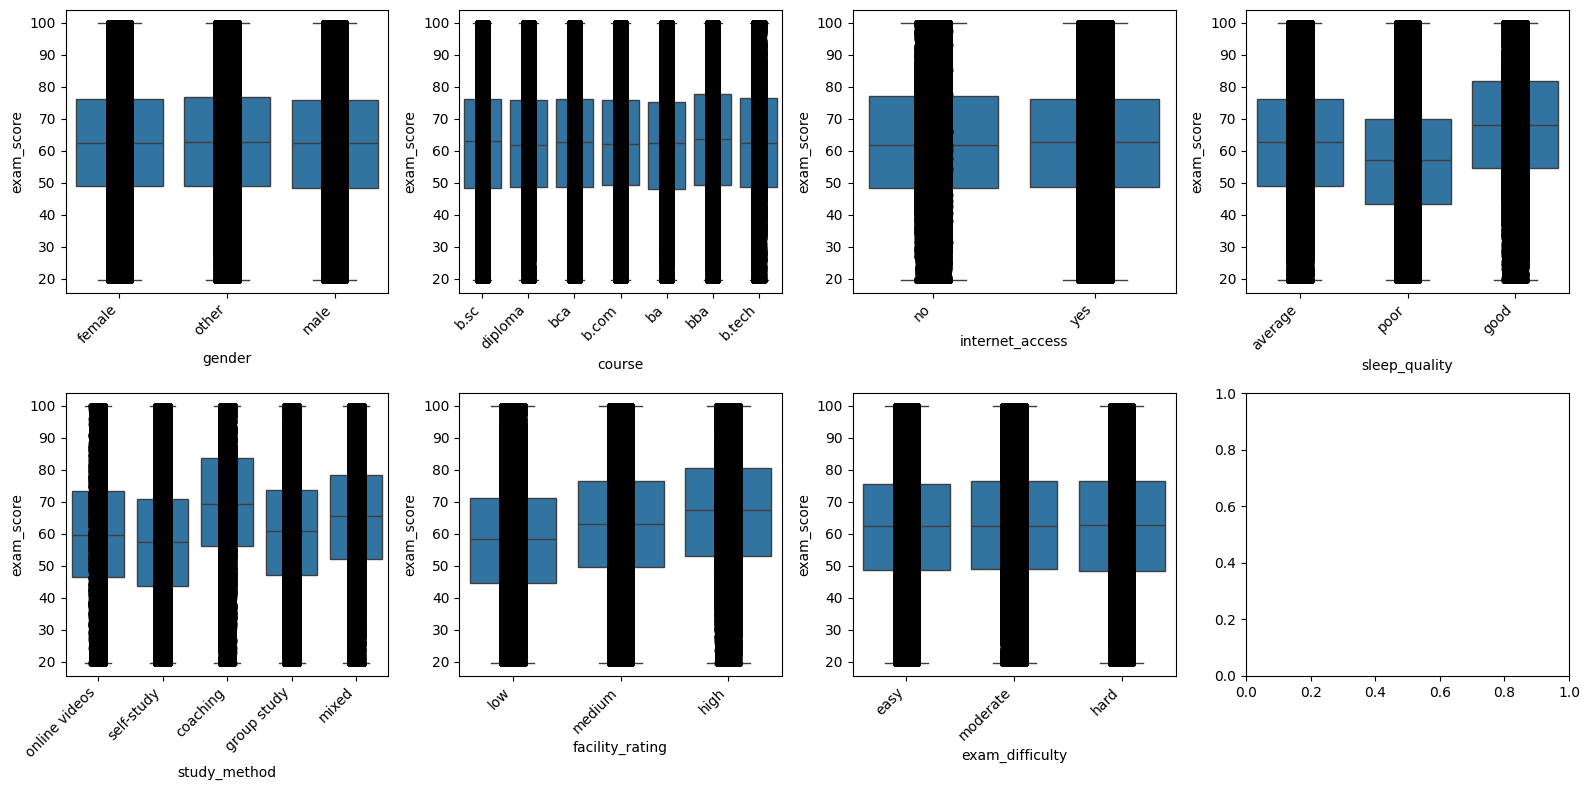

In [4]:
# 3. Categorical features vs score (box + strip)
cat_cols = ['gender', 'course', 'internet_access', 'sleep_quality', 
            'study_method', 'facility_rating', 'exam_difficulty']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flat

for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='exam_score', data=df, ax=axes[i])
    sns.stripplot(x=col, y='exam_score', data=df, color='black', alpha=0.5, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

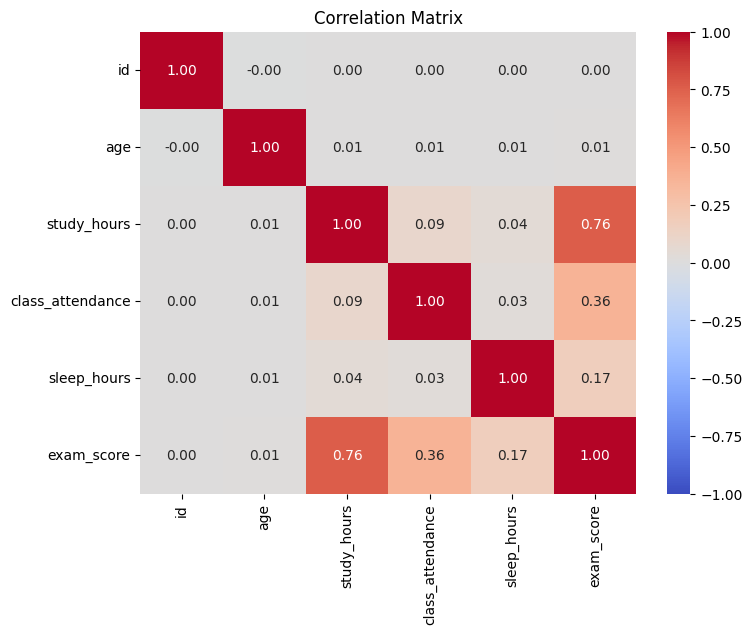

In [5]:
# 4. Correlation heatmap (only numeric)
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), 
            annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [6]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [7]:
df

,id,age,study_hours,class_attendance,sleep_hours,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,0,21,7.91,98.8,4.9,78.300,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
1,1,18,4.95,94.8,4.7,46.700,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
2,2,20,4.68,92.6,5.8,99.000,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
3,3,19,2.00,49.5,8.3,63.900,True,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,4,23,7.65,86.9,9.6,100.000,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,18,4.86,70.7,4.1,69.500,False,False,False,True,...,True,False,False,True,False,False,False,False,False,True
629996,629996,21,7.08,54.4,4.5,78.900,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
629997,629997,24,0.64,44.2,4.3,19.599,True,False,False,False,...,False,True,False,False,True,False,True,False,False,True
629998,629998,20,1.54,75.1,8.2,59.100,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [8]:
X = df.drop(['id','exam_score'], axis=1)

In [9]:
y=df["exam_score"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.20,
    random_state=42,
    stratify=y               # ← don't forget this!
)

In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,mean_squared_error,mean_absolute_error,r2_score
import numpy as np

models = {
    "CatBoost": CatBoostClassifier(random_seed=42, verbose=0),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
    "XGBoost":  XGBClassifier(random_state=42, eval_metric='auc'),
    "RandomForest": RandomForestClassifier(random_state=42)
}

model=XGBRegressor(random_state=42, eval_metric='auc')
# for name, model in models.items():
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = mean_squared_error(y_test, preds)          # √MSE
mae  = mean_absolute_error(y_test, preds)
r2   = r2_score(y_test, preds)

print(f"RMSE : {rmse:.3f}  (points)")
print(f"MAE  : {mae:.3f}   (average error in points)")
print(f"R²   : {r2:.3f}    (0–1, higher = better)")

# Bonus — very interpretable for exam scores
mape = np.mean(np.abs((y_test - preds) / y_test)) * 100
print(f"MAPE : {mape:.2f}%  (relative error)")

RMSE : 77.996  (points)
MAE  : 7.053   (average error in points)
R²   : 0.782    (0–1, higher = better)
MAPE : 13.04%  (relative error)


In [ ]:
df_test=pd.read_csv("datasets/student_score/test.csv")
